# **IMPORT NECESSARY LIBRARIES AND MODULES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy import stats
from yellowbrick.target import FeatureCorrelation

# **DATA INFORMATION**

In [2]:
data_path = 'cleaned_weatherAUS.csv'

df = pd.read_csv(data_path)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,5.116752,8.5775,W,44.0,W,...,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,5.116752,8.5775,WNW,44.0,NNW,...,1007.8,7.0,5.0,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,5.116752,8.5775,WSW,46.0,W,...,1008.7,7.0,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,5.116752,8.5775,NE,24.0,SE,...,1012.8,7.0,5.0,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,5.116752,8.5775,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,Yes,No,2008,12,5


In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.00000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,12.188119,23.235811,2.349974,4.948942,8.094868,39.880922,13.88494,18.561241,68.920646,51.510928,1017.680503,1015.279178,4.753723,4.752481,16.967368,21.726381,2012.757492,6.403482,15.714704
std,6.400488,7.112066,8.465173,2.210017,2.868427,13.154116,8.57018,8.778564,19.051760,20.708291,6.759875,6.694194,2.468789,2.260246,6.504388,6.963631,2.542272,3.426583,8.798882
min,-8.500000,-4.800000,0.000000,0.300000,0.000000,6.000000,0.00000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,3.600000,7.500000,31.000000,7.00000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,3.000000,12.200000,16.600000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,5.116752,8.577500,38.192376,13.00000,19.000000,70.000000,52.000000,1017.978981,1015.525185,4.907658,4.904279,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.800000,5.800000,9.500000,46.000000,19.00000,24.000000,83.000000,66.000000,1021.800000,1019.400000,7.000000,7.000000,21.600000,26.500000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,9.100000,14.500000,135.000000,37.00000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140787 entries, 0 to 140786
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140787 non-null  float64
 3   MaxTemp        140787 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    140787 non-null  float64
 6   Sunshine       140787 non-null  float64
 7   WindGustDir    140787 non-null  object 
 8   WindGustSpeed  140787 non-null  float64
 9   WindDir9am     140787 non-null  object 
 10  WindDir3pm     140787 non-null  object 
 11  WindSpeed9am   140787 non-null  float64
 12  WindSpeed3pm   140787 non-null  float64
 13  Humidity9am    140787 non-null  float64
 14  Humidity3pm    140787 non-null  float64
 15  Pressure9am    140787 non-null  float64
 16  Pressure3pm    140787 non-null  float64
 17  Cloud9am       140787 non-nul

In [5]:
print('Duplicated rows:', df.duplicated().sum())
print('NaN values in data:', df.isna().sum().sum())

Duplicated rows: 0
NaN values in data: 0


# NAIVE BAYES ALGORITHM IMPLEMENTATION

## ***Preprocessing***

In [6]:
df1 = pd.read_csv(data_path)

In [7]:
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,5.116752,8.5775,W,44.0,W,...,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,5.116752,8.5775,WNW,44.0,NNW,...,1007.8,7.0,5.0,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,5.116752,8.5775,WSW,46.0,W,...,1008.7,7.0,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,5.116752,8.5775,NE,24.0,SE,...,1012.8,7.0,5.0,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,5.116752,8.5775,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,Yes,No,2008,12,5


In [8]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month_name()
df1['Day'] = df1['Date'].dt.day_name()
df1['Quarter'] = df1['Date'].dt.quarter

df1.drop(columns='Date', inplace=True)
df1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Quarter
0,Albury,13.4,22.9,0.6,5.116752,8.5775,W,44.0,W,WNW,...,8.0,5.0,16.9,21.8,No,No,2008,December,Monday,4
1,Albury,7.4,25.1,0.0,5.116752,8.5775,WNW,44.0,NNW,WSW,...,7.0,5.0,17.2,24.3,No,No,2008,December,Tuesday,4
2,Albury,12.9,25.7,0.0,5.116752,8.5775,WSW,46.0,W,WSW,...,7.0,2.0,21.0,23.2,No,No,2008,December,Wednesday,4
3,Albury,9.2,28.0,0.0,5.116752,8.5775,NE,24.0,SE,E,...,7.0,5.0,18.1,26.5,No,No,2008,December,Thursday,4
4,Albury,17.5,32.3,1.0,5.116752,8.5775,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,Yes,No,2008,December,Friday,4


In [9]:
df1.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Year               int32
Month             object
Day               object
Quarter            int32
dtype: object

In [10]:
categorical_feature_cols = df1.select_dtypes(include=['object']).columns.drop('RainTomorrow')
categorical_feature_cols

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'Month', 'Day'],
      dtype='object')

### Encoding Features and Target columns

In [11]:
feature_encoder = OrdinalEncoder()
df1[categorical_feature_cols] = feature_encoder.fit_transform(df1[categorical_feature_cols])

target_encoder = OrdinalEncoder()
df1[['RainTomorrow']] = target_encoder.fit_transform(df1[['RainTomorrow']])

df1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Quarter
0,2.0,13.4,22.9,0.6,5.116752,8.5775,13.0,44.0,13.0,14.0,...,8.0,5.0,16.9,21.8,0.0,0.0,2008,2.0,1.0,4
1,2.0,7.4,25.1,0.0,5.116752,8.5775,14.0,44.0,6.0,15.0,...,7.0,5.0,17.2,24.3,0.0,0.0,2008,2.0,5.0,4
2,2.0,12.9,25.7,0.0,5.116752,8.5775,15.0,46.0,13.0,15.0,...,7.0,2.0,21.0,23.2,0.0,0.0,2008,2.0,6.0,4
3,2.0,9.2,28.0,0.0,5.116752,8.5775,4.0,24.0,9.0,0.0,...,7.0,5.0,18.1,26.5,0.0,0.0,2008,2.0,4.0,4
4,2.0,17.5,32.3,1.0,5.116752,8.5775,13.0,41.0,1.0,7.0,...,7.0,8.0,17.8,29.7,1.0,0.0,2008,2.0,0.0,4


### Features selection and Spliting the data

In [12]:
y = df1['RainTomorrow']
df1.drop(columns='RainTomorrow', inplace=True)
df1 = df1.astype('float64')
X = df1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## ***Implementing Naive Bayes algorithm***

In [13]:
class NaiveBayes:
  def __init__(self, smoothing=1.0):
    self.smoothing = smoothing
    self.priors = None
    self.means = None
    self.variances = None

  def fit(self, X, y):
    classes = np.unique(y)
    self.priors = np.zeros(len(classes))
    self.means = np.zeros((len(classes), X.shape[1]))
    self.variances = np.zeros((len(classes), X.shape[1]))

    for i, c in enumerate(classes):
      X_c = X[y == c]
      self.priors[i] = (X_c.shape[0] + self.smoothing) / (X.shape[0] + self.smoothing * len(classes))
      self.means[i] = np.mean(X_c, axis=0)
      self.variances[i] = np.var(X_c, axis=0) + self.smoothing

  def predict_proba(self, X):
    probabilities = np.zeros((X.shape[0], len(self.priors)))
    for i, c in enumerate(self.priors):
      # probabilities[:, i] = np.log(self.priors[i]) + np.sum(np.log(self.gaussian_pdf(X, self.means[i], self.variances[i])), axis=1)
        prob = np.log(self.priors[i]) + np.sum(np.log(self.gaussian_pdf(X, self.means[i], self.variances[i])), axis=1)
        probabilities[:, i] = prob
        #print(f"Class {i}, log probability: {prob}")
    return probabilities

  def predict(self, X):
    probabilities = self.predict_proba(X)
    return np.argmax(probabilities, axis=1)

  def gaussian_pdf(self, x, muy, sigma):
    epsilon = 1e-9
    return 1 / (np.sqrt(2 * np.pi * sigma)) * np.exp((-0.5 * (x - muy) ** 2 / (sigma + epsilon) ))

## ***Training the model and Evaluating***

In [14]:
nb_model = NaiveBayes()
nb_model.fit(X_train, y_train)

In [15]:
y_pred = nb_model.predict(X_test)

c:\Users\windown\PycharmProjects\helloWorld\.venv\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [16]:
accuracy = accuracy_score(y_test, y_pred)
confusion_matrx = confusion_matrix(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion matrix: {confusion_matrx}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')

Accuracy: 0.812628737836494
Confusion matrix: [[28900  3920]
 [ 3994  5423]]
Recall: 0.575873420409897
Precision: 0.5804345499304292


## ***Predicting on a new row of data***

In [17]:
new_row = {
    'Location': ['Sydney'],
    'MinTemp': [12.3],
    'MaxTemp': [22.5],
    'Rainfall': [0.2],
    'Evaporation': [5.0],
    'Sunshine': [8.0],
    'WindGustDir': ['W'],
    'WindGustSpeed': [30.0],
    'WindDir9am': ['NW'],
    'WindDir3pm': ['SE'],
    'WindSpeed9am': [10.0],
    'WindSpeed3pm': [20.0],
    'Humidity9am': [65],
    'Humidity3pm': [55],
    'Pressure9am': [1010.0],
    'Pressure3pm': [1008.0],
    'Cloud9am': [3],
    'Cloud3pm': [5],
    'Temp9am': [15.0],
    'Temp3pm': [21.0],
    'RainToday': ['Yes'],
    'Year': [2010],
    'Month': ['July'],
    'Day': ['Sunday'],
    'Quarter': [3]
}

new_row_df = pd.DataFrame(new_row)

categorical_cols_new_row = new_row_df.select_dtypes(include=['object']).columns

new_row_df[categorical_cols_new_row] = feature_encoder.transform(new_row_df[categorical_cols_new_row])

new_row_df = new_row_df.astype('float64')

proba = nb_model.predict_proba(new_row_df)

print("Raw probabilities:", proba)

softmax_probs = np.exp(proba) / np.sum(np.exp(proba), axis=1, keepdims=True)
print(f"Softmax Probabilities: No Rain: {softmax_probs[0][0]:.2f}, Rain: {softmax_probs[0][1]:.2f}")


Raw probabilities: [[-68.07595252 -70.72712275]]
Softmax Probabilities: No Rain: 0.93, Rain: 0.07


# MARKOV CHAINS IMPLEMENTATION

## ***Preprocessing***

In [18]:
df2 = pd.read_csv(data_path)
df2.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,5.116752,8.5775,W,44.0,W,...,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,5.116752,8.5775,WNW,44.0,NNW,...,1007.8,7.0,5.0,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,5.116752,8.5775,WSW,46.0,W,...,1008.7,7.0,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,5.116752,8.5775,NE,24.0,SE,...,1012.8,7.0,5.0,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,5.116752,8.5775,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,Yes,No,2008,12,5


In [19]:
df2 = df2[['RainToday', 'RainTomorrow']]

df2.dropna()

df2

,RainToday,RainTomorrow
0,No,No
1,No,No
2,No,No
3,No,No
4,Yes,No
...,...,...
140782,No,No
140783,No,No
140784,No,No
140785,No,No


## ***Implementing Markov Chains to predict***

In [20]:
states = ['No', 'Yes']

Matrix_T = pd.DataFrame(0, index=states, columns=states)

for i in range(len(df2) - 1):
  current = df2.iloc[i]['RainToday']
  next = df2.iloc[i + 1]['RainTomorrow']
  if current in states and next in states:
    Matrix_T.at[current, next] += 1

Matrix_T = Matrix_T.div(Matrix_T.sum(axis=1), axis=0)
Matrix_T.columns = pd.MultiIndex.from_tuples([('RainTomorrow', col) for col in Matrix_T.columns])
Matrix_T.index.name = "RainToday"
Matrix_T

RainTomorrow          
                    No       Yes
RainToday                       
No            0.812612  0.187388
Yes           0.667460  0.332540

## ***Transition Matrix***

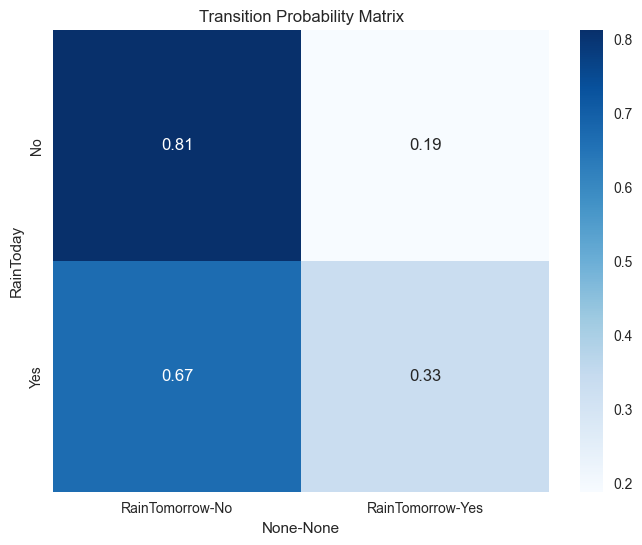

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(Matrix_T, annot=True, cmap='Blues', fmt='.2f')
plt.title('Transition Probability Matrix')
plt.show()

## ***Stationary Distribution***

In [22]:
eigvals, eigvecs = np.linalg.eig(Matrix_T.T)
stationary = np.abs(eigvecs[:, np.argmax(np.real(eigvals))])
stationary = stationary / np.sum(stationary)
print(stationary)

[0.78079331 0.21920669]


## ***Simulating Markov Chain and Evaluating the accuracy***

In [23]:
num_iterations = 10000
predicted_rain = []
actual_rain = []

np.random.seed(42)

current_state = np.random.choice(states)

for _ in range(num_iterations):
    actual_rain.append(current_state)
    next_state = np.random.choice(states, p=Matrix_T.loc[current_state].values, )
    predicted_rain.append(next_state)
    current_state = next_state

y_true = [1 if state == 'Yes' else 0 for state in actual_rain]
y_pred = [1 if state == 'Yes' else 0 for state in predicted_rain]

conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)

In [24]:
df_cm = pd.DataFrame(conf_matrix, index=['Actual Positive', 'Actual Negative'], columns=['Predicted Positive', 'Predicted Negative'])

print("Confusion Matrix:")
print(df_cm)

Confusion Matrix:
                 Predicted Positive  Predicted Negative
Actual Positive                6368                1442
Actual Negative                1442                 748


In [25]:
print("\nAccuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)


Accuracy: 0.7116
Recall: 0.3415525114155251
Precision: 0.3415525114155251


# MONTE CARLO SIMULATION IMPLEMENTATION

## ***Preprocessing***

In [26]:
df3 = pd.read_csv(data_path)
df3.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,5.116752,8.5775,W,44.0,W,...,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,5.116752,8.5775,WNW,44.0,NNW,...,1007.8,7.0,5.0,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,5.116752,8.5775,WSW,46.0,W,...,1008.7,7.0,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,5.116752,8.5775,NE,24.0,SE,...,1012.8,7.0,5.0,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,5.116752,8.5775,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,Yes,No,2008,12,5


In [27]:
df3.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Year               int64
Month              int64
Day                int64
dtype: object

In [28]:
df3.drop(columns='Date', inplace=True)
le = LabelEncoder()
df3['WindGustDir'] = le.fit_transform(df3['WindGustDir'])
df3['WindDir9am'] = le.fit_transform(df3['WindDir9am'])
df3['WindDir3pm'] = le.fit_transform(df3['WindDir3pm'])
df3['RainToday'] = le.fit_transform(df3['RainToday'])
df3['RainTomorrow'] = le.fit_transform(df3['RainTomorrow'])
df3['Location'] = le.fit_transform(df3['Location'])

In [29]:
df3.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,5.116752,8.5775,13,44.0,13,14,...,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,5.116752,8.5775,14,44.0,6,15,...,1007.8,7.0,5.0,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,5.116752,8.5775,15,46.0,13,15,...,1008.7,7.0,2.0,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,5.116752,8.5775,4,24.0,9,0,...,1012.8,7.0,5.0,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,5.116752,8.5775,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,1,0,2008,12,5


In [30]:
print(df3['RainTomorrow'].value_counts(normalize=True))

RainTomorrow
0    0.778382
1    0.221618
Name: proportion, dtype: float64


In [31]:
count_par_region = df3['Location'].value_counts()
percentage_par_region = (count_par_region / len(df)) * 100
percentage_par_region

Location
9     2.416416
37    2.365985
31    2.267965
13    2.267255
15    2.260862
7     2.224637
6     2.152187
39    2.150056
3     2.148636
22    2.146505
17    2.145084
0     2.145084
5     2.142954
32    2.137271
19    2.137271
20    2.134430
38    2.131589
1     2.128037
28    2.128037
35    2.125196
2     2.124486
44    2.123776
48    2.119514
33    2.119514
10    2.116673
8     2.105308
40    2.101757
42    2.101046
27    2.091102
47    2.090392
36    2.088971
11    2.088261
12    2.087551
24    2.080448
46    2.076896
14    2.076896
30    2.067662
34    2.064111
26    2.051326
4     2.043513
23    2.000185
21    1.982427
43    1.967511
29    1.879435
45    1.687656
18    1.632253
25    1.111608
16    1.097402
41    1.066860
Name: count, dtype: float64

In [32]:
column_names = df3.columns
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df3))

In [33]:
df_scale.columns = column_names
df_scale['RainTomorrow'] = le.fit_transform(df_scale['RainTomorrow'])

df_scale

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,-1.525999,0.189343,-0.047217,-0.206727,0.075932,0.168257,1.162448,0.313141,1.271989,1.360912,...,-1.221836,1.314931,0.109510,-0.010357,0.010572,-0.555528,0,-1.871361,1.633271,-1.672344
1,-1.525999,-0.748089,0.262117,-0.277606,0.075932,0.168257,1.369553,0.313141,-0.283477,1.578930,...,-1.117267,0.909873,0.109510,0.035766,0.369581,-0.555528,0,-1.871361,1.633271,-1.558693
2,-1.525999,0.111223,0.346481,-0.277606,0.075932,0.168257,1.576658,0.465185,1.271989,1.578930,...,-0.982822,0.909873,-1.217784,0.619989,0.211617,-0.555528,0,-1.871361,1.633271,-1.445041
3,-1.525999,-0.466860,0.669876,-0.277606,0.075932,0.168257,-0.701498,-1.207301,0.383151,-1.691335,...,-0.370349,0.909873,0.109510,0.174134,0.685510,-0.555528,0,-1.871361,1.633271,-1.331390
4,-1.525999,0.829921,1.274485,-0.159474,0.075932,0.168257,1.162448,0.085075,-1.394525,-0.165212,...,-1.386158,0.909873,1.436804,0.128011,1.145042,1.800088,0,-1.871361,1.633271,-1.217739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,1.214045,-1.357420,-0.201884,-0.277606,0.075932,0.168257,-1.529918,-0.675146,-1.172315,-1.691335,...,0.884474,0.504815,-0.775353,-1.163429,-0.118671,-0.555528,0,1.668792,-0.117751,0.487029
140783,1.214045,-1.466787,0.023086,-0.277606,0.075932,0.168257,-1.529918,-0.675146,0.383151,-1.473317,...,0.750029,0.504815,-0.775353,-1.055809,0.096734,-0.555528,0,1.668792,-0.117751,0.600680
140784,1.214045,-1.341796,0.290239,-0.277606,0.075932,0.168257,-0.287288,-1.359345,0.383151,-1.037282,...,0.570769,0.504815,-0.775353,-0.932815,0.398302,-0.555528,0,1.668792,-0.117751,0.714332
140785,1.214045,-1.060567,0.515209,-0.277606,0.075932,0.168257,-0.908603,-0.219014,0.383151,1.360912,...,0.227186,0.504815,-0.775353,-0.686826,0.628068,-0.555528,0,1.668792,-0.117751,0.827983


## ***Visualizing the distribution for dataset***

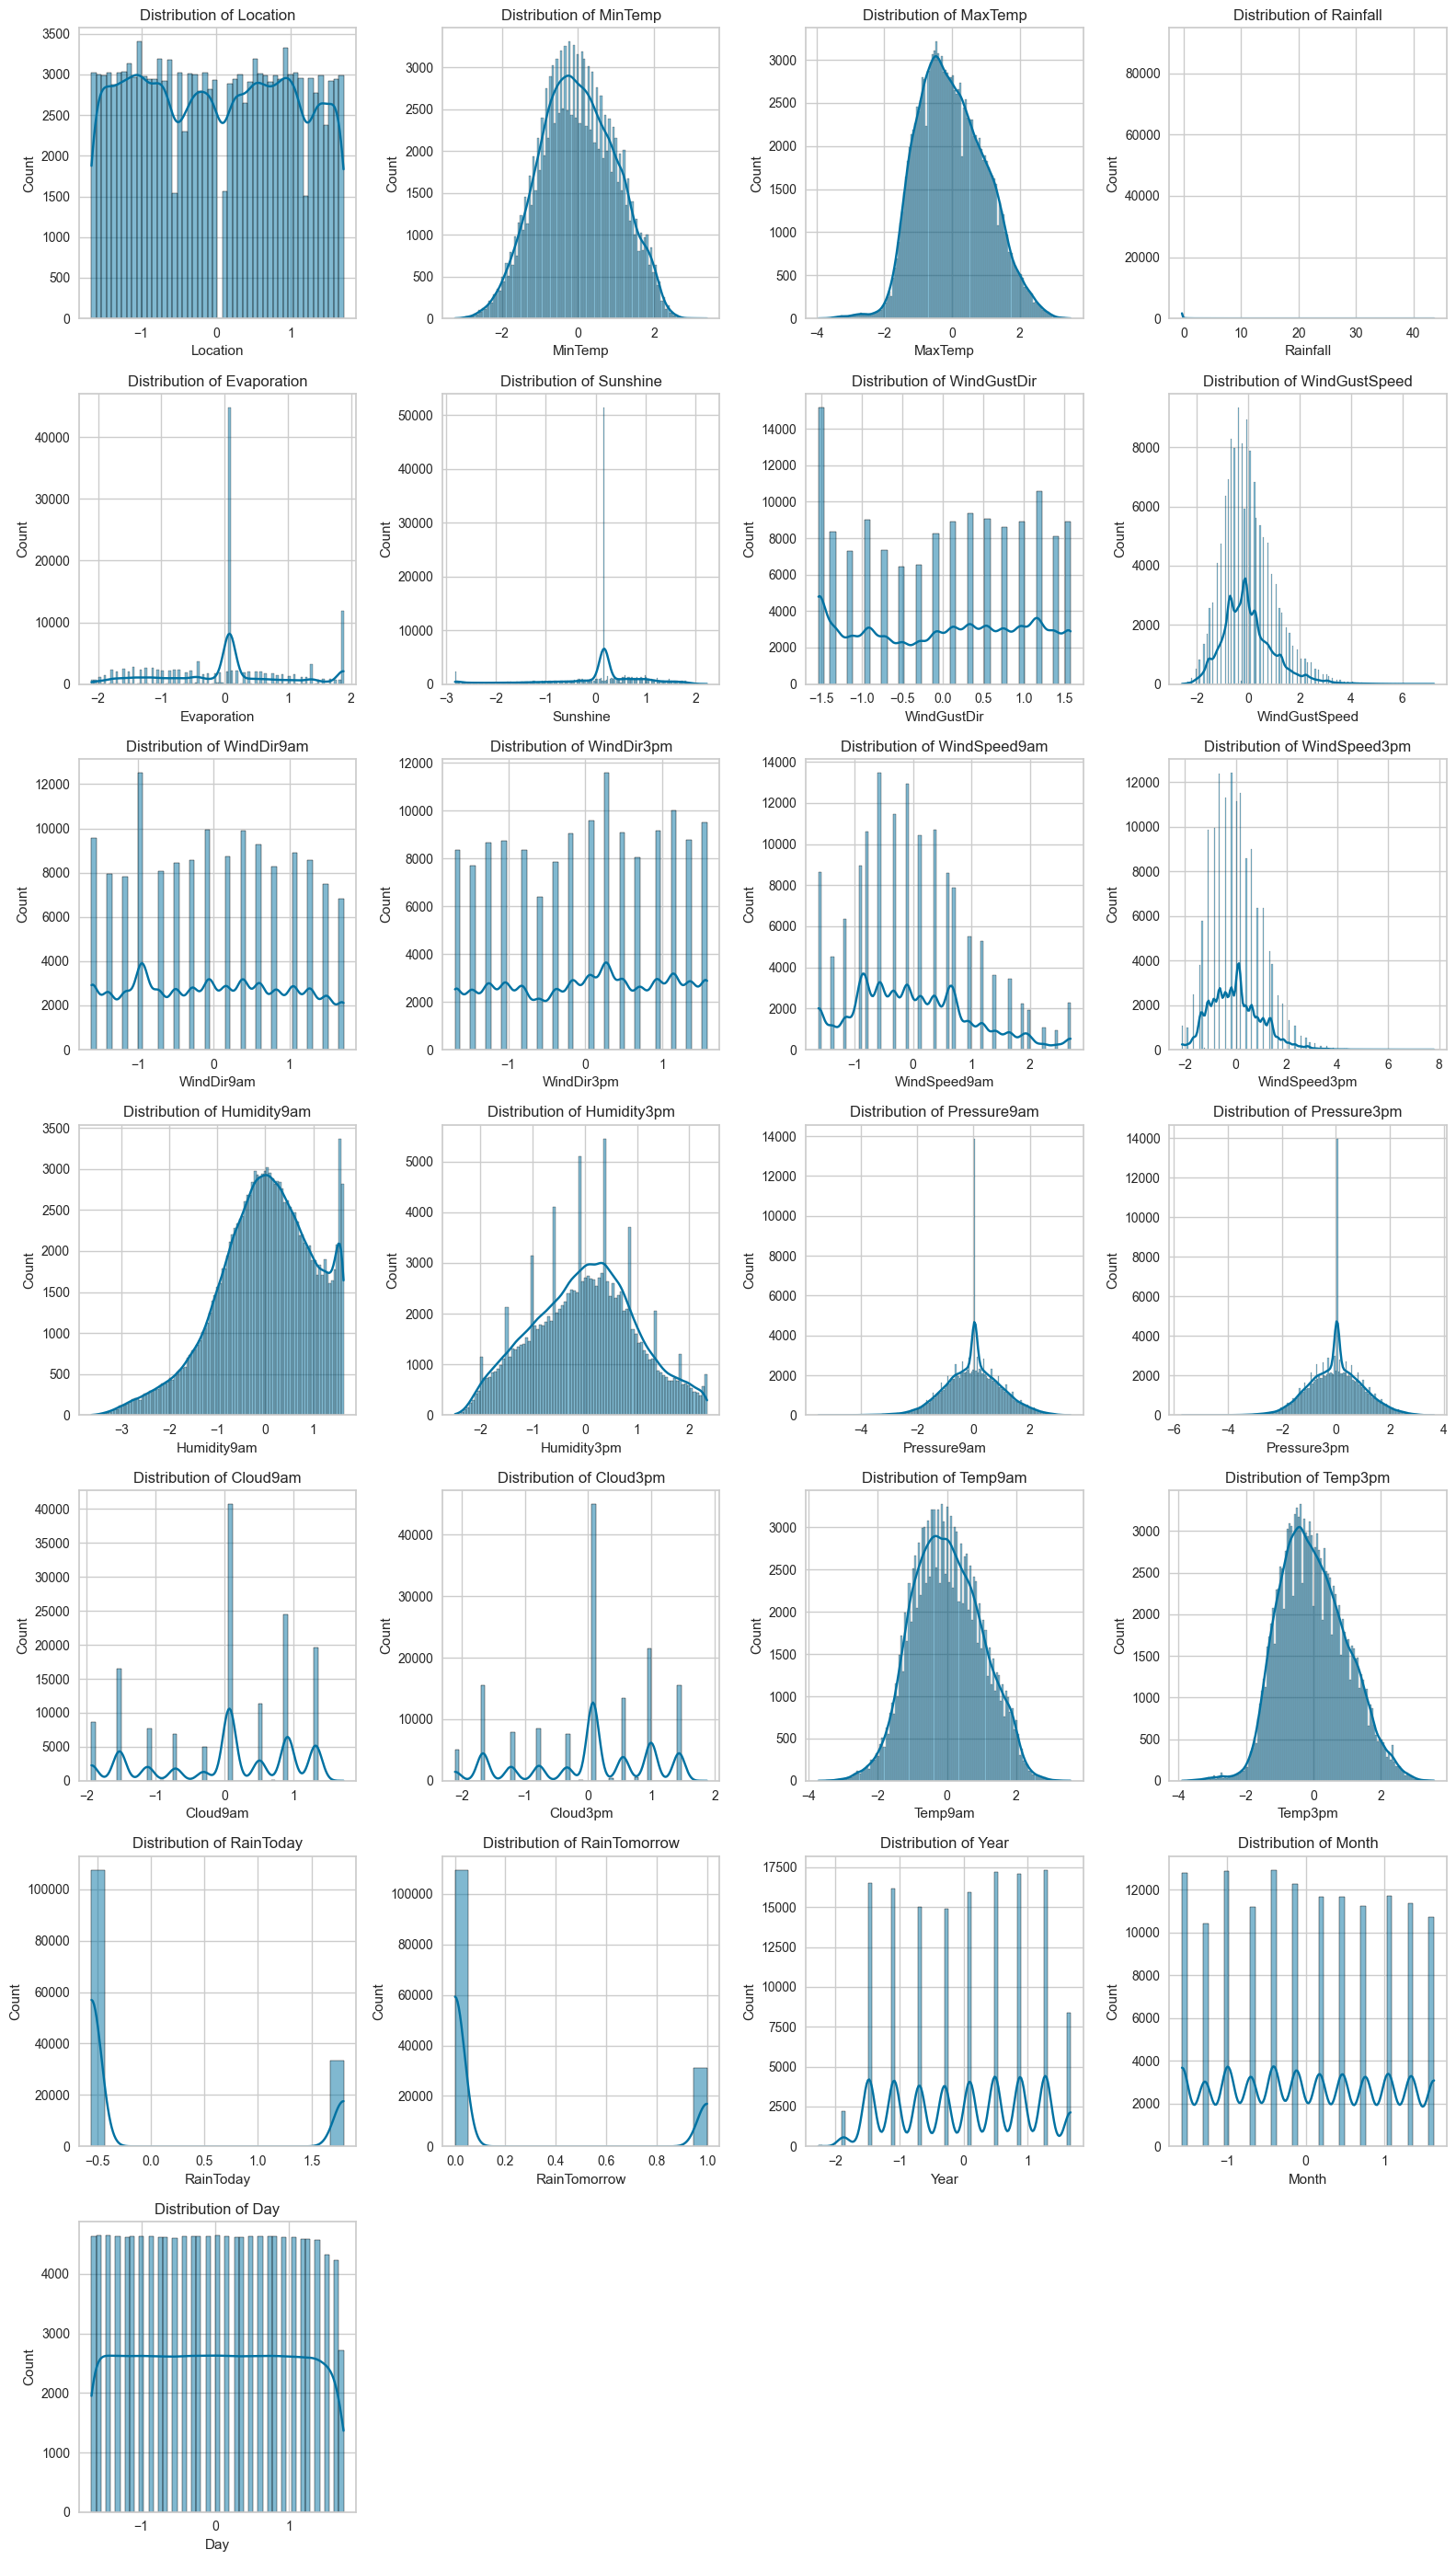

In [34]:
num_columns = df_scale.select_dtypes(include=['float64', 'int64']).columns

n_cols = 4
n_rows = int(np.ceil(len(num_columns) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()

for i, column in enumerate(num_columns):
    sns.histplot(df_scale[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

for i in range(len(num_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

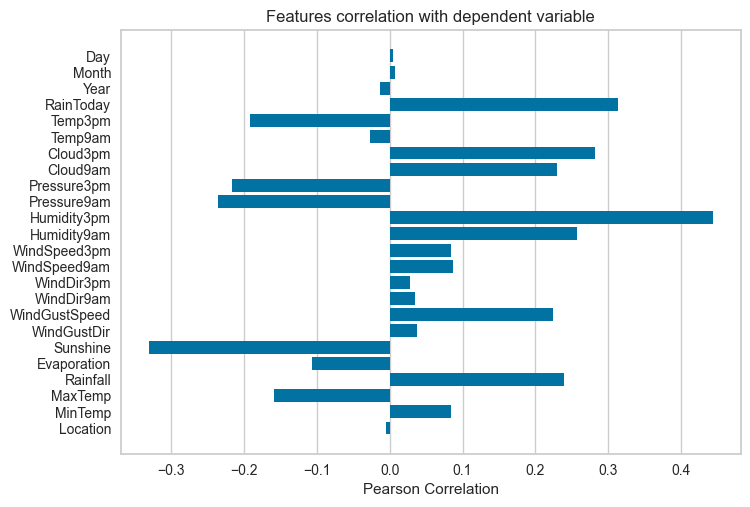

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [35]:
X = df_scale.drop(['RainTomorrow'],axis=1)
y = df_scale['RainTomorrow']

feature_names = list(X.columns)
visualizer = FeatureCorrelation(labels = feature_names)
visualizer.fit(X, y)
visualizer.poof()

## ***Training and Evaluating***

### Logistic Regression

In [36]:
X = df_scale.drop('RainTomorrow', axis=1)
y = df_scale['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision of 1: {precision_score(y_test, y_pred, pos_label=1)}')
print(f'Recall of 1: {recall_score(y_test, y_pred, pos_label=1)}')
print(f'F1-score of 1: {f1_score(y_test, y_pred, pos_label=1)}')
print(f'Precision of 0: {precision_score(y_test, y_pred, pos_label=0)}')
print(f'Recall of 0: {recall_score(y_test, y_pred, pos_label=0)}')
print(f'F1-score of 0: {f1_score(y_test, y_pred, pos_label=0)}')

Accuracy: 0.8435021426711178
Precision of 1: 0.7205027494108406
Recall of 1: 0.48699161091642773
F1-score of 1: 0.5811684197186668
Precision of 0: 0.8653267172167708
Recall of 0: 0.9457952468007312
F1-score of 0: 0.9037733651662494


### Monte Carlo + Logistic Regression

In [37]:
train_data, test_data = train_test_split(df_scale, test_size=0.3, random_state=42)

def monte_carlo_simulation(data, n_simulations=100):
    simulated_data = []
    
    target_mean = data['RainTomorrow'].mean()
    feature_stats = {}
    
    for column in data.columns:
        if column != 'RainTomorrow':
            feature_stats[column] = {
                'mean_0': data[data['RainTomorrow'] == 0][column].mean(),
                'std_0': data[data['RainTomorrow'] == 0][column].std(),
                'mean_1': data[data['RainTomorrow'] == 1][column].mean(),
                'std_1': data[data['RainTomorrow'] == 1][column].std()
            }
    
    for _ in range(n_simulations):
        samples = {}
        target_values = np.random.choice([0, 1], size=len(data), p=[1 - target_mean, target_mean])
        
        for column, stats in feature_stats.items():
            samples[column] = [
                np.random.normal(stats[f'mean_{t}'], stats[f'std_{t}'])
                for t in target_values
            ]
        
        sample_df = pd.DataFrame(samples)
        sample_df['RainTomorrow'] = target_values
        simulated_data.append(sample_df)
    
    return simulated_data

accuracy_results = []
precision_1_results = []
recall_1_results = []
f1_1_results = []
precision_0_results = []
recall_0_results = []
f1_0_results = []

for i in range(100):  
    simulated_data = monte_carlo_simulation(train_data, n_simulations=100)
    
    X_train = pd.concat([df.drop(columns=['RainTomorrow']) for df in simulated_data])
    y_train = pd.concat([df['RainTomorrow'] for df in simulated_data])

    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    X_test = test_data.drop(columns=['RainTomorrow'])
    y_test = test_data['RainTomorrow']
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision_1 = precision_score(y_test, y_pred, pos_label = 1)
    recall_1 = recall_score(y_test, y_pred, pos_label = 1)
    f1_1 = f1_score(y_test, y_pred, pos_label = 1)
    precision_0 = precision_score(y_test, y_pred, pos_label = 0)
    recall_0 = recall_score(y_test, y_pred, pos_label = 0)
    f1_0 = f1_score(y_test, y_pred, pos_label = 0)
    accuracy_results.append(accuracy)
    precision_1_results.append(precision_1)
    recall_1_results.append(recall_1)
    f1_1_results.append(f1_1)
    precision_0_results.append(precision_0)
    recall_0_results.append(recall_0)
    f1_0_results.append(f1_0)

mean_accuracy = np.mean(accuracy_results)
std_accuracy = np.std(accuracy_results)
mean_precision_1 = np.mean(precision_1_results)
std_precision_1 = np.std(precision_1_results)
mean_recall_1 = np.mean(recall_1_results)
std_recall_1 = np.std(recall_1_results)
mean_f1_1 = np.mean(f1_1_results)
std_f1_1 = np.std(f1_1_results)
mean_precision_0 = np.mean(precision_0_results)
std_precision_0 = np.std(precision_0_results)
mean_recall_0 = np.mean(recall_0_results)
std_recall_0 = np.std(recall_0_results)
mean_f1_0 = np.mean(f1_0_results)
std_f1_0 = np.std(f1_0_results)

print("Kết quả Monte Carlo Simulation:")
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)
print("-----------Label 1 (RainTomorrow = Yes)-----------")
print("Mean Precision:", mean_precision_1)
print("Standard Deviation of Precision:", std_precision_1)
print("Mean Recall:", mean_recall_1)
print("Standard Deviation of Recall:", std_recall_1)
print("Mean f1:", mean_f1_1)
print("Standard Deviation of f1:", std_f1_1)
print("-----------Label 0 (RainTomorrow = No)-----------")
print("Mean Precision:", mean_precision_0)
print("Standard Deviation of Precision:", std_precision_0)
print("Mean Recall:", mean_recall_0)
print("Standard Deviation of Recall:", std_recall_0)
print("Mean f1:", mean_f1_0)
print("Standard Deviation of f1:", std_f1_0)


Kết quả Monte Carlo Simulation:
Mean Accuracy: 0.7973710254042663
Standard Deviation of Accuracy: 6.057706190187567e-05
-----------Label 1 (RainTomorrow = Yes)-----------
Mean Precision: 0.5380318549589422
Standard Deviation of Precision: 0.00011256562164396179
Mean Recall: 0.644894340023362
Standard Deviation of Recall: 0.0002581357166736025
Mean f1: 0.5866362406979064
Standard Deviation of f1: 0.00015291266546082932
-----------Label 0 (RainTomorrow = No)-----------
Mean Precision: 0.8919524765054488
Standard Deviation of Precision: 6.745936906818429e-05
Mean Recall: 0.8411209628275442
Standard Deviation of Recall: 6.648926908195418e-05
Mean f1: 0.8657912652898159
Standard Deviation of f1: 3.999535107319125e-05
